In [65]:
import pandas
import sys
import numpy as np
import random as rd
import math

#Imports para dibujar un circulo
import matplotlib.pyplot as plt


# Estructuras de Datos:

# Parámetros: x,y del punto
class Punto(): 
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def print(self):
        print('(',self.x, ', ',self.y,')')
    def __repr__(self):
        return '(%s, %s)' % (self.x,self.y)
    def __str__(self):
        return '(%s, %s)' % (self.x,self.y)

# Parámetros: centro x,y, radio
class Circunferencia(): 
    def __init__(self, x, y, radio):
        self.centro = Punto(x,y)
        self.radio = radio
        
    def print(self):
        print('Centro: ',self.centro, ' Radio: ',self.radio)
    def __repr__(self):
        return 'Centro: %s Radio: %s' % (self.centro,self.radio)
    def __str__(self):
        return 'Centro: %s Radio: %s' % (self.centro,self.radio)
    
# Parámetros: circunferencia
class CircunferenciaConPuntos(): 
    def __init__(self,circunferencia):
        self.circunferencia = circunferencia
        self.puntos = []
        
    def anyadir_punto(self,punto):
        self.puntos.append(punto)
        
        
    def print(self):
        print('Circunferencia: ',self.circunferencia, ' Puntos: ',self.puntos)
    def __repr__(self):
        return 'Circunferencia: %s Puntos: %s' % (self.circunferencia,self.puntos)
    def __str__(self):
        return 'Circunferencia: %s Puntos: %s' % (self.circunferencia,self.puntos)
    
    

# Funciones para leer, crear y mostrar datos:
    
# Extra: crear puntos a partir de circunferencias:
# Parámetros: nombre del archivo a crear, array con las circunferencias, número de puntos que queremos de cada una y rangos en los que queramos que puedan variar los puntos
# REF: https://gis.stackexchange.com/questions/76745/creating-a-circle-with-points
def generar_puntos_de_circunferencias(nombre_archivo, circunferencias, n_puntos_circunferencia, rango_x, rango_y):
    
    #Calculamos los puntos
    puntos = []
    
    for i in range(len(circunferencias)):
        x = circunferencias[i].centro.x
        y = circunferencias[i].centro.y
        radio = circunferencias[i].radio
        arc = (2 * math.pi) / n_puntos_circunferencia[i]
        
        for p in range(n_puntos_circunferencia[i]):
            px = (0*math.cos(arc * p)) - (radio*math.sin(arc * p))
            py = (radio*math.cos(arc * p)) + (0*math.sin(arc * p))
            px += x
            py += y
            puntos.append((px,py))
            
            
    # Los escribimos en un fichero      
    f = open("%s.csv" % nombre_archivo,"w+")
    
    if(len(puntos)/2>3):
        intervalo = rd.randint(3,math.floor(len(puntos)/2))
    else:
        intervalo = 2
        
    for i in range(len(puntos)):
        
        if(i%intervalo==0):
            x = puntos[i][0]
            y = puntos[i][1]
            x = x + rd.uniform(-rango_x, rango_x)
            y = y + rd.uniform(-rango_y, rango_y)
            
            f.write("%f,%f\n" % (x,y))
        else:
            f.write("%f,%f\n" % puntos[i])
    
    f.close() 




#Parámetros: Archivo CSV donde se encuentran los puntos
def leer_puntos(archivo_csv):
   
    puntoscsv = pandas.read_csv(archivo_csv, header=None, names=['x', 'y']).values
    puntos = []
    for i in range(len(puntoscsv)):
        puntos.append(Punto(puntoscsv[i][0],puntoscsv[i][1]))
        
    return puntos


# Parámetros: Array de puntos
def dibujar_puntos(puntos):  # learningaboutelectronics.com/Articles/How-to-draw-a-circle-using-matplotlib-in-Python.php
    
    Xs = []
    Ys = []
    
    for i in range(len(puntos)): 
        Xs.append(puntos[i].x)
        Ys.append(puntos[i].y)
        
    plt.plot(Xs, Ys, 'ro', color='black')
    plt.axis('scaled')
    
    plt.show()
    
    
# Parámetros: Circunferencia con Puntos
def dibujar_circunferencia_con_puntos(circunferenciaConPuntos):  # learningaboutelectronics.com/Articles/How-to-draw-a-circle-using-matplotlib-in-Python.php
    
    # Lista de colores con los que se representará las circunferencias con sus puntos asociados
    colores = ['red','blue','green','black','yellow','purple','cyan','pink','magenta','orange','brown']
    
    for i in range(len(circunferenciaConPuntos)):
       
        ccp = circunferenciaConPuntos[i]
        Xs = []
        Ys = []
        
        # Dibujamos los puntos asociados a la circunferencia
        for p in ccp.puntos:
            Xs.append(p.x)
            Ys.append(p.y)
        
        plt.plot(Xs, Ys, 'ro', color=colores[i])
        
        #Dibujamos la circunferencia
        circulo = plt.Circle((ccp.circunferencia.centro.x, ccp.circunferencia.centro.y), ccp.circunferencia.radio, color=colores[i], fill=False)
        ax=plt.gca()
        ax.add_patch(circulo)
        plt.axis('scaled')
    
    plt.show()

    

# Algoritmo:

# Parametros: array con todos los puntos, nº de circunferencias totales, mínimo grado de pertenencia de cada uno de los puntos asociados a un cluster con esa circunferencia para que pare,
#             nº máximo de veces que se inicializarán las circunferencias iniciales, mínima diferencia entre las circunferencias calculadas en el clustering, nº máximo de iteraciones en el clustering             
def obtener_circunferencias_con_incertidumbre(puntos, n_circunferencias, min_grado_pertenencia, max_iteraciones_algoritmo, razon_parada_clustering, max_iteraciones_clustering):
    
    iterar = 1
    n_iteraciones = 0
    
    # Guardamos el mejor resultado para que en caso de que se supere el máximo nº de iteraciones se devuelva este y no el último
    mejor_circunferencias_con_puntos = None
    mejor_circunferencias_con_puntos_min_grado = 0
    
    while(iterar and n_iteraciones < max_iteraciones_algoritmo):
        
        # Inicializamos el clustering con circunferencias y puntos asociados al azar a partir de todos los puntos
        circunferencias_iniciales = obtener_circunferencias_iniciales(puntos, n_circunferencias)
        circunferencias_con_puntos_iniciales = obtener_circunferencias_con_puntos(circunferencias_iniciales, puntos)
        
        # Sobre esas circunferencias iniciales hacemos clustering para que se ajusten a los puntos
        circunferencias_con_puntos_finales = clustering_circunferencias(puntos, circunferencias_con_puntos_iniciales, razon_parada_clustering, max_iteraciones_clustering)
        
        # Si una de las circunferencias tiene menos de 3 puntos(los necesarios para calcular la nueva circunferencia), se sale de este bucle y se vuelve a comenzar.
        if(circunferencias_con_puntos_finales == None):
            continue
        
        #Calculamos el mínimo grado de pertenencia de los puntos con su circunferencia asociada tras el clustering
        min_grado_actual = comprobar_grado_pertenencia(circunferencias_con_puntos_finales)
        
        #Si se ha mejorado, se guarda el resultado (En la primera iteración siempre se guardará)
        if(mejor_circunferencias_con_puntos_min_grado < min_grado_actual):
            
            mejor_circunferencias_con_puntos = circunferencias_con_puntos_finales
            mejor_circunferencias_con_puntos_min_grado = min_grado_actual
            
            # Si se ha alcanzado el menor grado de adherencia esperado por el usuario, se devuelve el resultado
            if(min_grado_actual > min_grado_pertenencia):
                iterar = 0
            
        n_iteraciones = n_iteraciones + 1
        
        
    return mejor_circunferencias_con_puntos


# Funciones utilizadas por el algoritmo:


# Crea n circunferencias iniciales al azar a partir de 3 puntos de la lista de todos los puntos.
# Parámetros: Array de todos los puntos, número de circunferencias totales
def obtener_circunferencias_iniciales(puntos,n_circunferencias): 
    
    circunferencias = []
    
    for i in range(n_circunferencias):
        
        puntosRandom = rd.sample(puntos,3)
        circunferencia = obtener_circunferencia(puntosRandom)
        circunferencias.append(circunferencia)
    
    return circunferencias


# Le asocia a cada circunferencia los puntos que tengan mayor grado de pertenencia con ella
# Parámetros: array de las circunferencias y todos los puntos
def obtener_circunferencias_con_puntos(circunferencias, puntos):
    
    circunferencias_con_puntos = []
    for circunferencia in circunferencias:
        circunferencias_con_puntos.append(CircunferenciaConPuntos(circunferencia))
    
    for p in puntos:
        gradosPert = grados_pertenencia(p,circunferencias)
        indice = np.where(gradosPert == max(gradosPert))
        circunferencias_con_puntos[indice[0][0]].anyadir_punto(p)
        
    
    
    return circunferencias_con_puntos



# Devuelve un array con los grados de pertenencia de un punto a todas las circunferencias
# Parámetros: punto al que queremos calcular los grados de pertenencia, array de todas las circunferencias
def grados_pertenencia(p,circunferencias):
    
    #Calculamos la distancia del punto a cada circunferencia
    distancias = []
    
    for i in range(len(circunferencias)):
        d = np.sqrt(pow(p.x - circunferencias[i].centro.x,2) + pow(p.y - circunferencias[i].centro.y,2))
        distancias.append(abs(d - circunferencias[i].radio))
    
    #Calculamos el grado de pertencia a cada circunferencia con la siguiente fórmula: 100/distancia^2
    pertenencias = []
    
    for i in range(len(circunferencias)):
        if(distancias[i]==0.0):
            per = 100.0
        else:
            per = 100/(pow(distancias[i],2))
        pertenencias.append(per)
        
    #Normalizamos
    suma = sum(pertenencias)
    pertenencias = np.divide(pertenencias,suma)
    
    return pertenencias


# Obtiene una circunferencia mas cercana a partir de sus puntos asociados mediante clustering, pero estos pueden ir variando
# Parámetros: array con todos los puntos, los clusteres previos, la razon de parada, es decir, a partir de que diferencia minima entre circunferencias parará, y el máximo número de iteraciones que realizará.
def clustering_circunferencias(puntos, clusters_prev, razon_parada, max_iteraciones):
    
    iterar = 1
    iteraciones = 0;
    
    while(iterar and iteraciones <= max_iteraciones):
        
        diferencia = []
        
        # Obtenemos clusters mejores (Explicación en el método) 
        clusters_post = obtener_siguientes_clusters(puntos, clusters_prev)
        
        # Si una de las circunferencias tiene menos de 3 puntos(los necesarios para calcular la nueva circunferencia), no se realiza la clusterización.
        if(clusters_post == None):
            return None;
        
        # Calculamos la diferencia entre los clusters previos y posteriores a partir de su centro y radio.
        for i in range(len(clusters_prev)):
            
            prev_centro = clusters_prev[i].circunferencia.centro
            prev_radio = clusters_prev[i].circunferencia.radio
            post_centro = clusters_post[i].circunferencia.centro
            post_radio = clusters_post[i].circunferencia.radio
            
            diferencia.append(np.sqrt((prev_centro.x - post_centro.x)**2 + (prev_centro.y - post_centro.y)**2) + abs(prev_radio - post_radio))
            
        # Si es menor que la razón, es el final de la clusterización
        if(max(diferencia) < razon_parada):    
            iterar = 0
            
        # Si no ha parado, en la siguiente iteración el cluster previo será el calculado en esta
        clusters_prev = clusters_post
        iteraciones = iteraciones + 1
        
        
    return clusters_post


# Se calculan los siguientes clusters a partir de los puntos asociados a cada uno de ellos.
def obtener_siguientes_clusters(puntos, clusters_prev):
    
    clusters_post = []
    
    for cluster_prev in clusters_prev:
        
        puntos_cluster = cluster_prev.puntos
        
        # Si una de las circunferencias tiene menos de 3 puntos(los necesarios para calcular la nueva circunferencia), no se realiza la clusterización.
        if(len(puntos_cluster) < 3):
            return None
        
        # Se obtiene la nueva circunferencia a partir de 3 puntos asociados a ella
        clusters_post.append(obtener_circunferencia(obtener_3_puntos(puntos_cluster)))
        
    # Se devuelve la nueva circunferencia con los nuevos puntos asociados a ella (Pueden ser los mismos que antes o no)
    return obtener_circunferencias_con_puntos(clusters_post, puntos)


# Parámetros: Array de todos los puntos
def obtener_3_puntos(puntos):
    
    # Se obtienen 3 puntos al azar del array de puntos
    randomVals = rd.sample(puntos,3)
        
    return randomVals[0],randomVals[1],randomVals[2]


# Genera una circunferencia a partir de los 3 puntos pasados
# Parámetros: Array de 3 puntos
# REF: codewars.com/kata/give-the-center-and-the-radius-of-circumscribed-circle-a-warm-up-challenge/python
def obtener_circunferencia(puntos): 
    
    x1 = puntos[0].x
    x2 = puntos[1].x
    x3 = puntos[2].x
    y1 = puntos[0].y
    y2 = puntos[1].y
    y3 = puntos[2].y
    
    D = 2*(x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2))
    
    # Comprobamos si los 3 puntos forman una recta, y si es así ...
    if(D==0):
        puntosNuevos = [puntos[0], puntos[1]]
        distancia = np.sqrt(pow(x1-x2,2)+pow(y1-y2,2))
        x3 = x1 + distancia
        y3 = y1 + distancia
        puntoNuevo = Punto(x3,y3)
        puntosNuevos = [puntos[0], puntos[1], puntoNuevo]
        return obtener_circunferencia(puntosNuevos)
    
        
    Ux = ((pow(x1,2) + pow(y1,2)) * (y2-y3) + (pow(x2,2) + pow(y2,2)) * (y3-y1) + (pow(x3,2) + pow(y3,2)) * (y1-y2))/D
    Uy = ((pow(x1,2) + pow(y1,2)) * (x3-x2) + (pow(x2,2) + pow(y2,2)) * (x1-x3) + (pow(x3,2) + pow(y3,2)) * (x2-x1))/D
    AB = np.sqrt(float(pow(x2-x1,2) + pow(y2-y1,2)))
    BC = np.sqrt(float(pow(x3-x2,2) + pow(y3-y2,2)))
    AC = np.sqrt(float(pow(x3-x1,2) + pow(y3-y1,2)))
    diametro = (2*AB*BC*AC)/abs(D)
    
    circunferencia = Circunferencia(float(Ux),float(Uy),float(diametro/2))
    
    return circunferencia
    

# Devuelve el mínimo grado de pertenencia que tenga un puntode los puntos asociados a una circunferencia respecto a esa circunferencia de entre todas ellas.
def comprobar_grado_pertenencia(circunferencias_con_puntos):
    
    circunferencias = []
    grados_por_cluster = []
    grados_por_punto = []
    i = 0
    
    for circunferencia_con_puntos in circunferencias_con_puntos:
        circunferencias.append(circunferencia_con_puntos.circunferencia)
        
    
    for circunferencia_con_puntos in circunferencias_con_puntos:
        for p in circunferencia_con_puntos.puntos:
            grados_por_punto.append(max(grados_pertenencia(p,circunferencias)))
           
        grados_por_cluster.append(min(grados_por_punto))
        
    return min(grados_por_cluster)

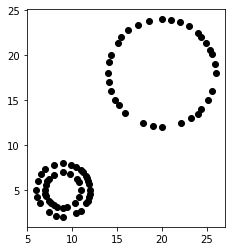

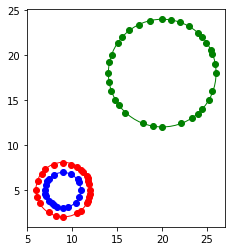

In [83]:
puntos = leer_puntos('Data/puntos_agustin_2.csv')

dibujar_puntos(puntos)

num_circunferencias = 3
min_grado_pertenencia = 0.98
max_iteraciones_algoritmo = 500
razon = 0.01
max_iteraciones_clustering = 10

circunferencias_con_puntos = obtener_circunferencias_con_incertidumbre(puntos,num_circunferencias, min_grado_pertenencia, max_iteraciones_algoritmo, razon, max_iteraciones_clustering)

dibujar_circunferencia_con_puntos(circunferencias_con_puntos)

In [84]:
circunferencias = [Circunferencia(0,0,3),Circunferencia(4,0,2), Circunferencia(10,5,3)]
n_puntos_circunferencia = [20,20, 20]
rango_x = 1
rango_y = 0.5

generar_puntos_de_circunferencias("Data/puntos_aleatorios", circunferencias, n_puntos_circunferencia, rango_x, rango_y)

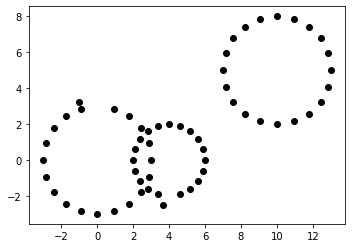

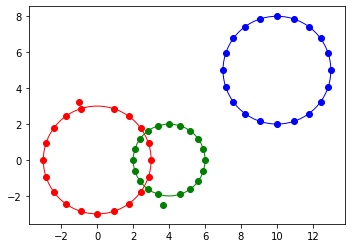

In [85]:
puntos = leer_puntos('Data/puntos_aleatorios.csv')

dibujar_puntos(puntos)

num_circunferencias = 3
min_grado_pertenencia = 0.97
max_iteraciones_algoritmo = 100
razon = 0.01
max_iteraciones_clustering = 10

circunferencias_con_puntos = obtener_circunferencias_con_incertidumbre(puntos,num_circunferencias, min_grado_pertenencia, max_iteraciones_algoritmo, razon, max_iteraciones_clustering)

dibujar_circunferencia_con_puntos(circunferencias_con_puntos)